# Car Price Prediction

This project is deplyed using Heroku: https://carpriceanalysis.herokuapp.com/

# 1.Business/Real-world Problem

<h2>1.1. Problem Statement </h2>

In this problem, the goal is to predict the price of a car based on the given parameters of a car.

<h2>1.2 Source </h2>

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

This dataset is provided by Car Dekho.

<h2>1.3. Real-world/Business objectives and constraints.</h2>

1. Predict the price of a car with minimal error.
2. Should predict the test time in few seconds.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

1. The Data has been provided by Car Dekho.
2. There are 5 categorical features,3 numerical features and Ground Truth.
3. Total number of Datapoints is 301.

<h2>2.2. Type of Machine Learning Problem</h2>

It is a Regression Problem. The task is to predict the Selling price of a Car

<h2>2.3. Performance Metric</h2>

The Performance Metric to be used is Mean Squared Error.

The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and values close to zero are better.

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.shape

(301, 9)

In [4]:
data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [4]:
print("Seller Types:", data['Seller_Type'].unique())
print("Fuel Types:",data['Fuel_Type'].unique())
print("Transmission Types:",data['Transmission'].unique())
print("Owner Types:",data['Owner'].unique())

Seller Types: ['Dealer' 'Individual']
Fuel Types: ['Petrol' 'Diesel' 'CNG']
Transmission Types: ['Manual' 'Automatic']
Owner Types: [0 1 3]


In [6]:
##check missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing values.

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [40]:
data = data.drop(['Car_Name'], axis=1)

In [32]:
data.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [41]:
data['Current_Year']=2020

In [42]:
data['Years_used']=data['Current_Year']- data['Year']

In [43]:
data.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Years_used
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7


In [44]:
data = data.drop(['Year'],axis=1)
data = data.drop(['Current_Year'],axis=1)

In [45]:
data=pd.get_dummies(data,drop_first=True)

In [46]:
data.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1


In [47]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_used,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


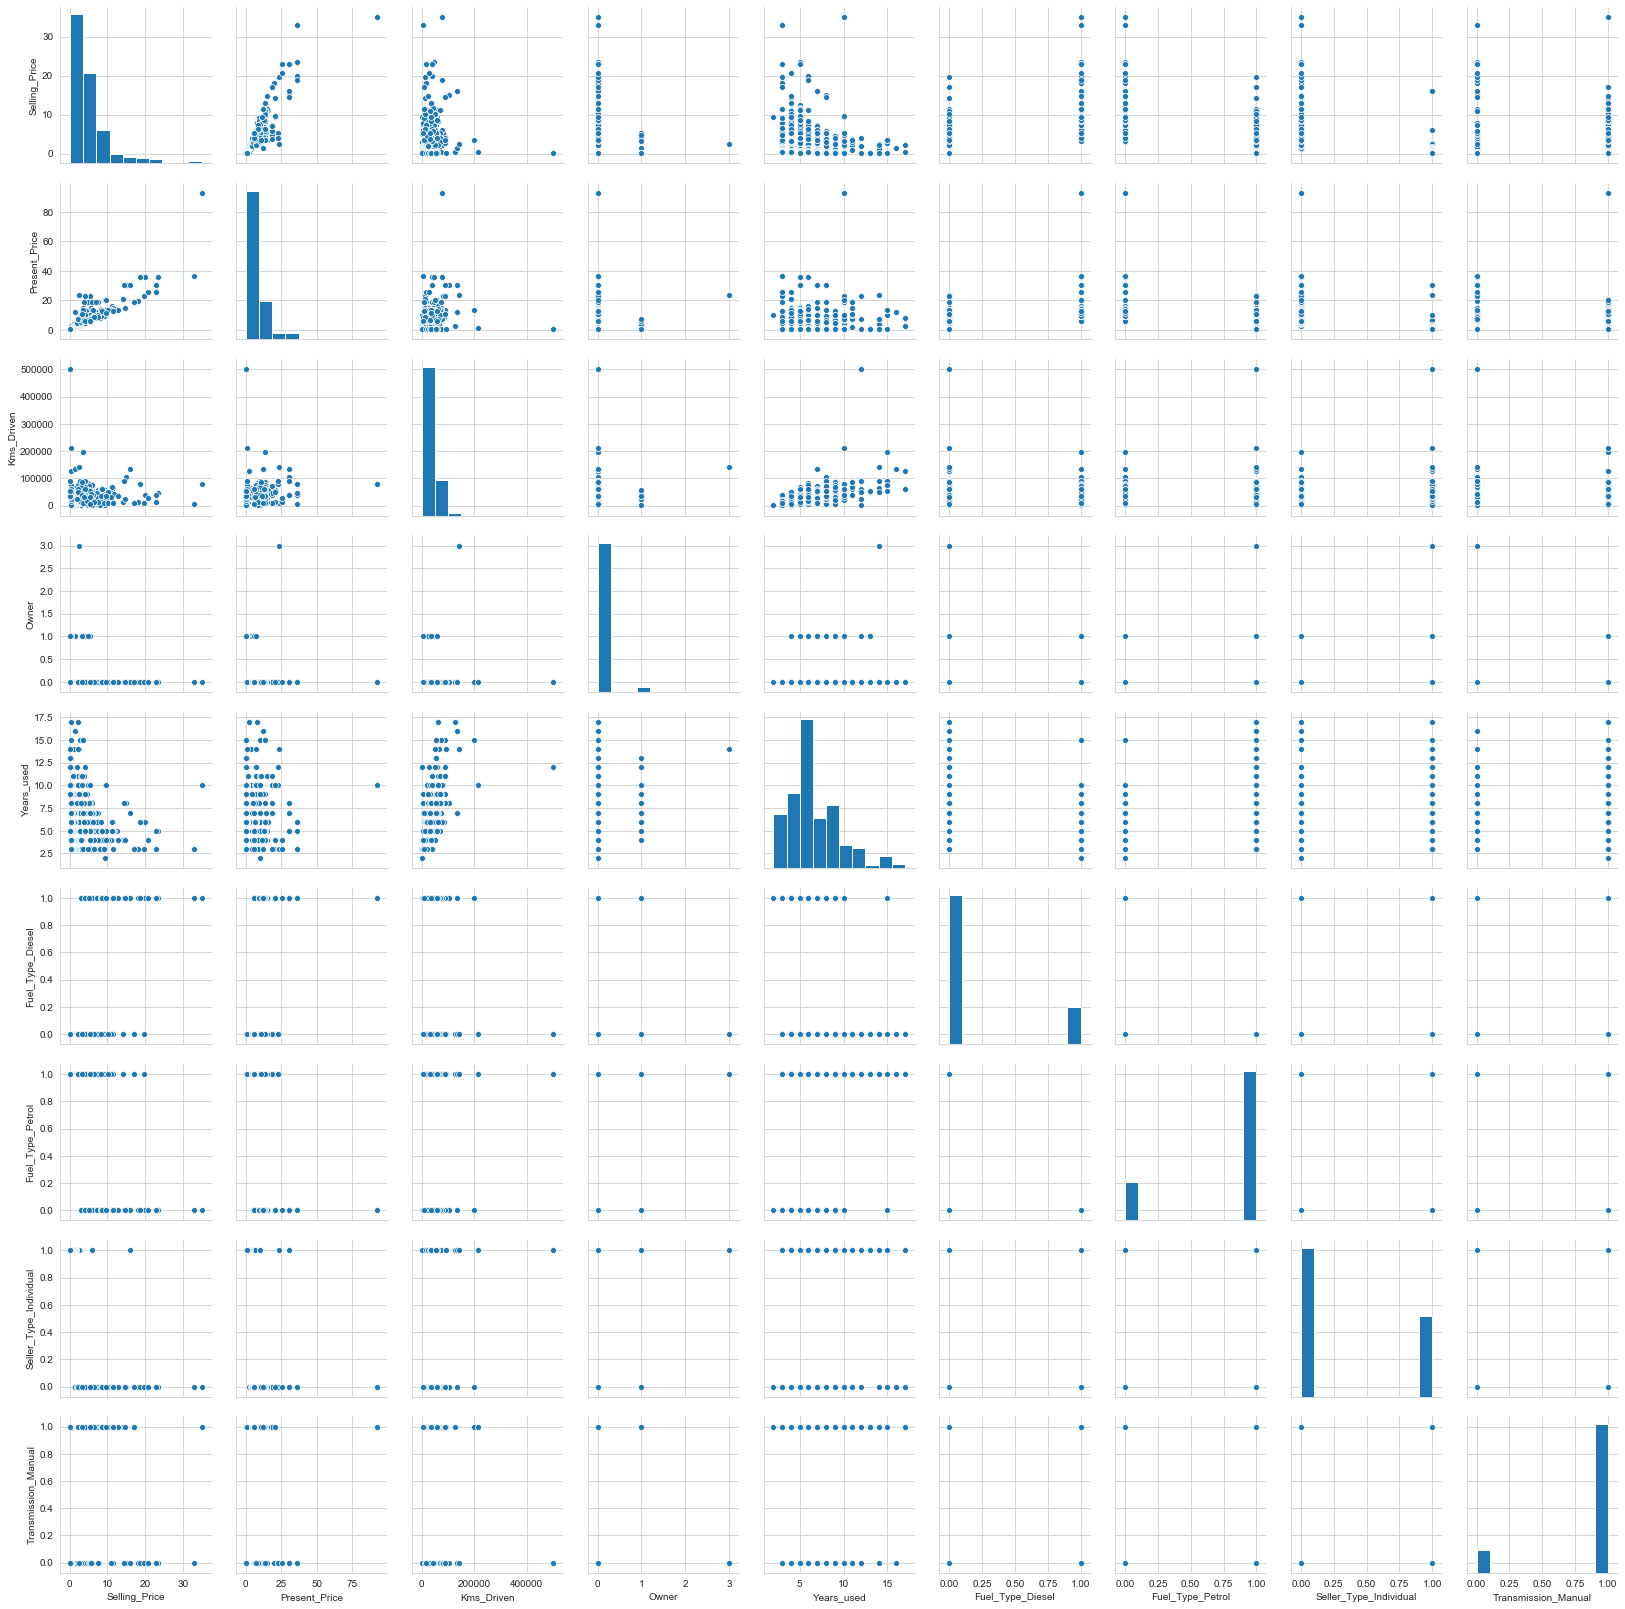

In [51]:
sns.set_style("whitegrid")
sns.pairplot(data)
plt.show()

From the above plots we can see that certain features have some co-relation.

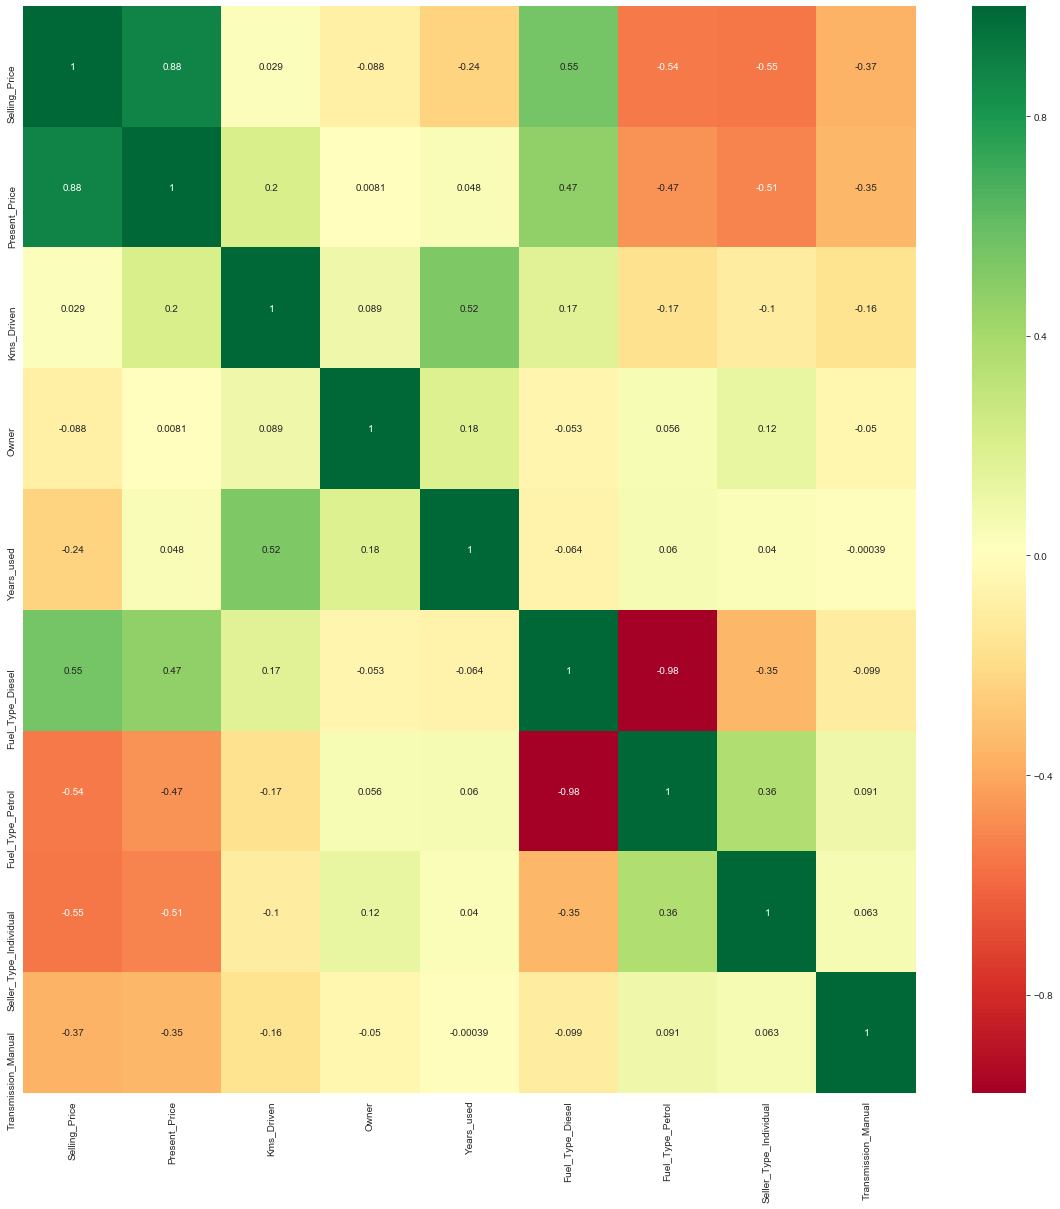

In [52]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can clearly see the positive co-relations from the above heatmap.

<h1>4. Data Preparation</h1>

In [54]:
#Separating the features and ground truth values
Y = data['Selling_Price'].values
X = data.drop(['Selling_Price'], axis=1)

In [55]:
X.head(2)

,Present_Price,Kms_Driven,Owner,Years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<h1>4. Modelling</h1>

<h3> Linear Regression : Baseline</h3>

In [73]:
model_lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
model_lr.fit(X_train,y_train)

y_pred_tr = model_lr.predict(X_train) #Classification on train data
y_pred = model_lr.predict(X_test) #Classification on test data

print('Train MSE:', mean_squared_error(y_train,y_pred_tr))
print('Test MSE:', mean_squared_error(y_test,y_pred))

Train MSE: 2.556983351092275
Test MSE: 4.43212826566762


A Mean Squared Error of 4.432 is taken as Baseline.

<h3>Extra Trees Regressor</h3>

In [76]:
neigh=ExtraTreesRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[150,200,300,350,400,500],
             'max_depth':[2,3,4,5,7,8,10],
             'min_samples_split':[2,3,4,5,6,7,8,10],
             'max_features': [.95],
             'min_samples_leaf': [3,4,5,6,7,8,10],
             'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='neg_mean_squared_error',return_train_score=True,n_jobs=-1,verbose=5)#Uisng k-fold cross validation with k=5
clf.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,...
                   para

In [77]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']
for i,j in zip(train_r2,cv_r2):
    print("Train:{} CV:{}".format(i,j))

Train:-4.557432139129207 CV:-5.898127549693774
Train:-20.99912242647576 CV:-22.80772362180186
Train:-7.324204602280998 CV:-9.096412617614686
Train:-4.1728016473584475 CV:-5.186641046244432
Train:-23.790710650877635 CV:-24.22934008230452
Train:-7.329938248931528 CV:-9.046142791484233
Train:-3.6534596769583536 CV:-4.927414312249709
Train:-3.6534596769583545 CV:-4.927414312249709
Train:-4.190725317336495 CV:-5.233063896723612
Train:-5.512378890213022 CV:-6.646222319467451


In [78]:
clf.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [79]:
model_xt = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)
model_xt.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

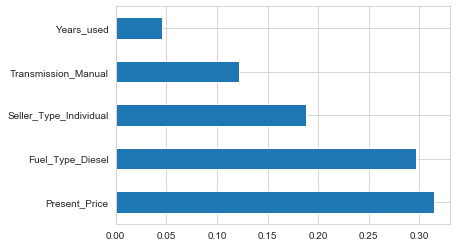

In [80]:
feat_importances = pd.Series(model_xt.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

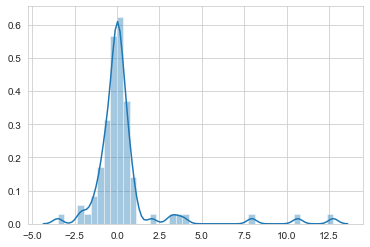

In [85]:
y_pred = model_xt.predict(X_test)
sns.distplot(y_test-y_pred)

In [87]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 4.71869672781898


<h3> Random Forest Regressor</h3>

In [82]:
neigh=RandomForestRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[100,150,200,300,350,500],
             'max_depth':[2,3,5,7,10],
             'min_samples_split':[2,3,4,5,6,7,8,9,10],
             'max_features': [.95],
             'min_samples_leaf': [1, 2,3,4,5,6,7,8,9],
             'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='neg_mean_squared_error',return_train_score=True,n_jobs=-1,verbose=5)#Uisng k-fold cross validation with k=5
clf.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [83]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [84]:
model_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

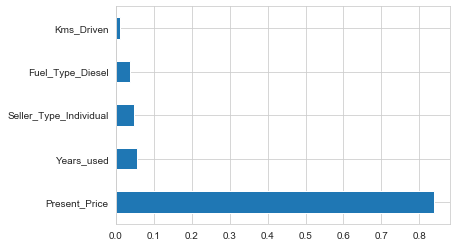

In [90]:
feat_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

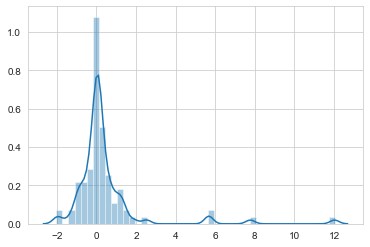

In [88]:
y_pred = model_rf.predict(X_test)
sns.distplot(y_test-y_pred)

In [89]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 3.476131134586982


<h3>XGBoost Regressor</h3>

In [92]:
neigh=XGBRegressor(random_state=42,n_jobs=-1)
parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1],
             'n_estimators':[100,150,200,500],
             'max_depth':[2,3,5,10],
             'colsample_bytree':[0.1,0.5,0.7,1],
             'subsample':[0.2,0.3,0.5,1],
             'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],
             'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)#Uisng k-fold cross validation with k=5
clf.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished


[11:11:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alp...
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
                               

In [94]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']
for i,j in zip(train_r2,cv_r2):
    print("Train:{}  CV:{}".format(i,j))

Train:-0.47672872964415747  CV:-0.6292215244633106
Train:0.9950653347353196  CV:0.846542644633278
Train:0.45372110395880805  CV:0.511040720520511
Train:0.9976244987923873  CV:0.7038812323267121
Train:0.7366168067175265  CV:0.6228743790758455
Train:-0.4379019137063008  CV:-0.6043549108181085
Train:0.9301215066253787  CV:0.6570061947773882
Train:0.5316018518097887  CV:0.5101621319046763
Train:0.5700538367462361  CV:0.5952746307799263
Train:0.7484575570809339  CV:0.613505394321079


In [95]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [96]:
model_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

model_xgb.fit(X_train,y_train)

[11:12:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

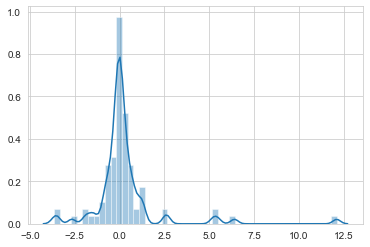

In [97]:
y_pred = model_xgb.predict(X_test)
sns.distplot(y_test-y_pred)

In [98]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 3.537765601644637


In [99]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_rf, file)